## Representación de Datos

In [4]:
# library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json

import networkx as nx

import requests
import json
from bs4 import BeautifulSoup
from IPython.display import display
from random import choice
 
from funciones_scraping import get_languages, get_social
from funciones_files import ask_tags_comma_separated, ask_user_and_grade, save_set_users


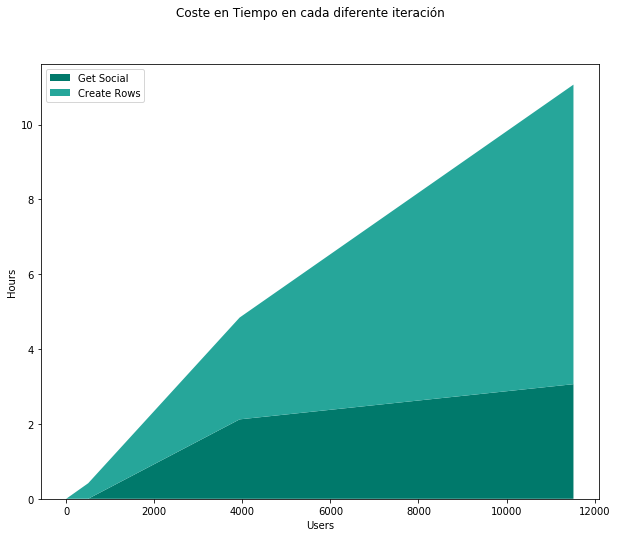

In [5]:
# https://www.canva.com/learn/100-color-combinations/
# https://material.io/design/color/the-color-system.html#tools-for-picking-colors
# https://matplotlib.org/users/colors.html

mpl.rcParams['axes.prop_cycle']

# Timeit
x_num_users = [0, 500, 3939, 11520]
y_social = [0, 3847,  7642800, 11027477] # get social
y_dfrows = [0, 1494739, 9796075, 28818747] # create rows

ys = [t/3600000 for t in y_social] # get social
yr = [t/3600000 for t in y_dfrows] # create rows

x = x_num_users
y = [ys, yr]
 
# Plot
# let myColors = ['#E0F2F1', '#B2DFDB', '#80CBC4', '#4DB6AC', '#26A69A', '#009688', '#00897B', '#00796B', '#00695C', '#A7FFEB', '#64FFDA', '#1DE9B6', '#00BFA5'] // lista de colores random en hex
# let myColors = ['#E0F2F1', '#B2DFDB', '#80CBC4', '#4DB6AC', '#26A69A', '#009688', '#00897B', '#00796B', '#00695C', '#A7FFEB', '#64FFDA', '#1DE9B6', '#00BFA5'] // lista de colores random en hex

fig, ax = plt.subplots(figsize=(10,8))
plt.stackplot(x,y, labels=['Get Social','Create Rows'], colors=['#00796B', '#26A69A', ])
plt.grid(False)
plt.legend(loc='upper left')
plt.suptitle('Coste en Tiempo en cada diferente iteración')
plt.xlabel('Users')
plt.ylabel('Hours')
plt.savefig('../output/Coste-tiempo-iteracion.png')
plt.show()

In [6]:
ys, yr

([0.0, 0.001068611111111111, 2.123, 3.0631880555555555],
 [0.0, 0.41520527777777777, 2.7211319444444446, 8.0052075])

### Coste en tiempo de cada iteración

### D3

In [7]:
# languages = [lang for lang in get_languages() if lang in df.columns]
# languages

In [8]:
# {"name": "php", "size": 2},
def create_d3(data): 
    df = data
    idiomas = []
    languages = [lang for lang in get_languages() if lang in df.columns]
    for col in languages: 
        idiomas.append({'name': col, "size": int(df[col].sum())})
    res = {"name": "Lenguajes","children": [{"name": "Lenguajes","children": [{"name": "Lenguajes","children": idiomas}]}]}
    
    return json.dumps(res, ensure_ascii=False)

def save_d3_languages_json(lang_json, filename='../representacion_d3/lenguajes.json'): 
    with open(filename, 'w') as f: 
        f.write(lang_json)

In [9]:
df = pd.read_csv('../output/df-limpio-iter3.csv', index_col=0)
save_d3_languages_json(create_d3(df))

In [10]:
# file:///home/alberto/Escritorio/IH/proyecto-final-IH/representacion_d3/treemap.html

### Grafo de aliados

In [11]:
def create_rows_graph(list_users): 
    x = []
    y = []
    for user in list_users: 
        social = get_social(user)
        for s in social: 
            x.append(user)
            y.append(s)
    return x, y

In [12]:
# usuarios = ask_tags_comma_separated('Introduce los usuarios separados por coma: ')
# x, y = create_rows_graph(usuarios)

x, y = create_rows_graph({'albertogcmr', 'boyander'})


In [13]:
df_social2 = pd.DataFrame({'from': x, 'to': y})
df_social2.head()

,from,to
0,albertogcmr,xFloki
1,albertogcmr,yacineh
2,albertogcmr,daniloxxv
3,albertogcmr,evapanizo
4,albertogcmr,Girgetto


In [14]:
# honor de los usuarios 
users_from = list(set(df_social2['from']))
valores = df[df['username'].isin(users_from)]['honor']

grosor_nodos = list(valores)

# normalizamos valores
def media(x): 
    return sum(x)/len(x)
grosor_nodos = [100*e/media(grosor_nodos) for e in grosor_nodos]
# grosor_nodos

In [25]:
# https://python-graph-gallery.com/network-chart/

# colors=['#26A69A', '#80CBC4']
plt.figure(figsize=(8,8)) 

G = nx.from_pandas_edgelist(df=df_social2, source='from', target='to', create_using=nx.Graph())
'''
colores = []
for i in range(len(G.nodes())): 
    if i < 8: 
        colores.append('red')
    else: 
        colores.append('blue')
        

nx.draw_kamada_kawai(G, node_size=grosor_nodos, node_color=colores, edge_color='#26A69A', with_labels=False)
'''
pass

<Figure size 576x576 with 0 Axes>

/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


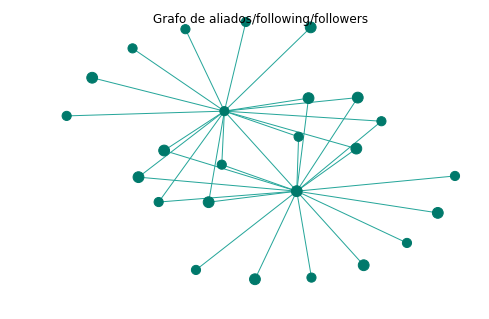

In [26]:
nx.draw_kamada_kawai(G, node_size=grosor_nodos, node_color='#00796B', edge_color='#26A69A', with_labels=False)

plt.suptitle('Grafo de aliados/following/followers')
plt.savefig('../output/Grafo-set-users.png')
plt.show()

### Grafo de grados de separación

In [77]:
def get_social_from_users_set(users_set): 
    res = users_set
    errors = []
    for i, user in enumerate(users_set): 
        try: 
            res = res.union(get_social(user))
        except: 
            errors.append(user)
            
    save_set_users(users=errors, filename='../errors/social-error.txt')
    return res

In [78]:
user, grade = ask_user_and_grade()

# let myColors = ['#E0F2F1', '#B2DFDB', '#80CBC4', '#4DB6AC', '#26A69A', '#009688', '#00897B', '#00796B', '#00695C', '#A7FFEB', '#64FFDA', '#1DE9B6', '#00BFA5'] // lista de colores random en hex


usuarios = {user}
COLORES = ['#30dfce', '#E37F6A', '#AC1814', '#4A6579', '#146AAC']
colores = ['black']
for i in range(grade): 
    social = get_social_from_users_set(usuarios)
    usuarios = usuarios.union(social)
    colores.extend([COLORES[i]]*len(social))
    

Introduce nombre de usuario: albertogcmr
Introduce numero de saltos: 2


In [79]:
colores = colores[:len(usuarios)]
len(usuarios), len(colores)

(68, 68)

In [80]:
x, y = create_rows_graph(usuarios)
df_social = pd.DataFrame({'from': x, 'to': y})
df_social.head()

,from,to
0,jacobb,CSandman
1,jacobb,thrap
2,jacobb,enerney
3,jacobb,paragonHex
4,jacobb,rtwo14


In [81]:
# honor de los usuarios 
users_from = list(set(df_social['from']))
valores = df[df['username'].isin(users_from)]['honor']

grosor_nodos = list(valores)

# normalizamos valores
def media(x): 
    return sum(x)/len(x)
grosor_nodos = [100*e/media(grosor_nodos) for e in grosor_nodos]
# grosor_nodos

In [82]:
'''
colores = []
for i in range(len(F.nodes())): 
    if i < 12: 
        colores.append('red')
    elif i < 68: 
        colores.append('blue')
    else: 
        colores.append('yellow')
        
'''
# nx.draw_kamada_kawai(F, node_size=grosor_nodos, node_color=colores, edge_color='#26A69A', with_labels=False)
pass

In [83]:
plt.figure(figsize=(12,12)) 

F = nx.from_pandas_edgelist(df=df_social, source='from', target='to', create_using=nx.Graph())

n_nodos = len(list(F.nodes()))
colores.extend(['#146AAC']*(n_nodos))

colores = colores[:n_nodos]
n_nodos, len(colores)

(498, 498)

<Figure size 864x864 with 0 Axes>

/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


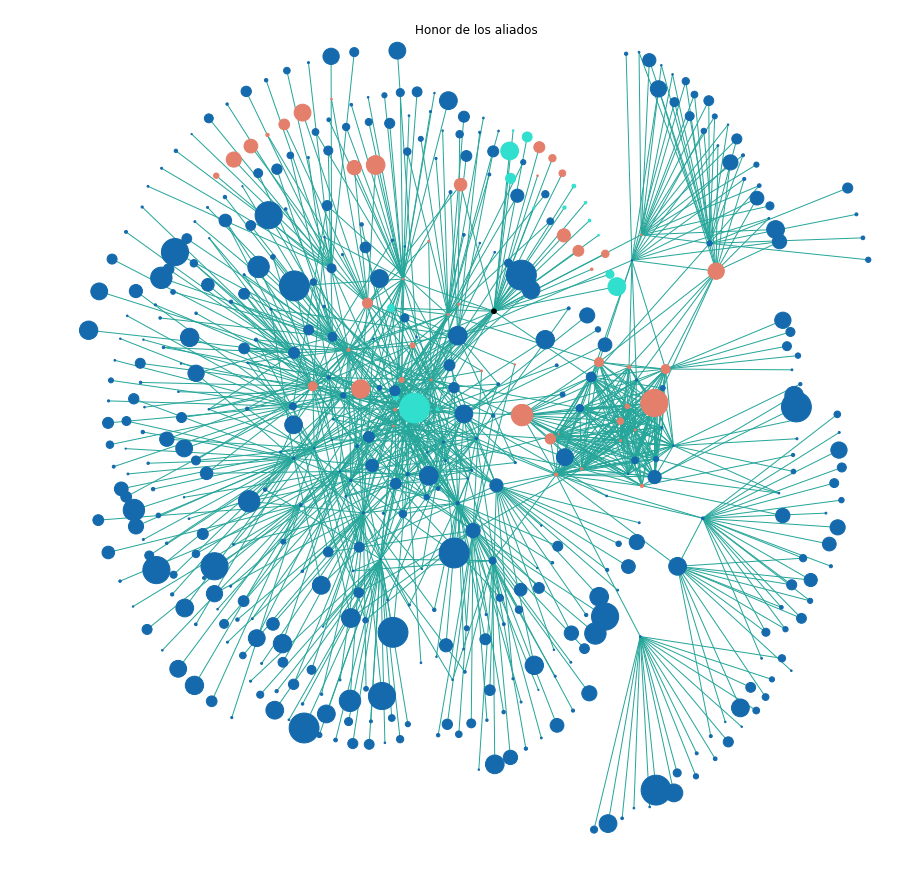

In [84]:
# nx.draw_kamada_kawai(F, node_size=grosor_nodos, node_color='#00796B', edge_color='#26A69A', with_labels=False)

plt.figure(figsize=(12,12)) 

nx.draw_kamada_kawai(F, node_size=grosor_nodos, node_color=colores, edge_color='#26A69A', with_labels=False)

plt.suptitle('Honor de los aliados')
plt.savefig('../output/Grafo-grados.png')
plt.show()

In [73]:
len(list(F.nodes()))

498